In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets import interact, FloatSlider, fixed, HBox, VBox, Output
import ipywidgets as widgets
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Set a larger figure size for better visualization
plt.rcParams['figure.figsize'] = [12, 8]

def plot_distributions(df=5, x_range=5, show_distribution_diff=True):
    """
    Plot Gaussian (normal) and t-distributions side by side
    
    Parameters:
    -----------
    df : float
        Degrees of freedom for t-distribution
    x_range : float
        Range of x-axis to display (-x_range to +x_range)
    show_distribution_diff : bool
        Whether to show the difference between distributions
    """
    # Create the figure and axes
    fig = plt.figure(figsize=(15, 9))
    
    if show_distribution_diff:
        gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, :])
    else:
        gs = fig.add_gridspec(1, 2)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
    
    # Generate x values
    x = np.linspace(-x_range, x_range, 1000)
    
    # Compute PDF values
    gaussian_pdf = stats.norm.pdf(x)
    t_pdf = stats.t.pdf(x, df)
    
    # Plot Gaussian (normal) distribution
    ax1.plot(x, gaussian_pdf, 'b-', lw=2, label='Gaussian Distribution')
    ax1.set_title('Gaussian (Normal) Distribution', fontsize=14)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plot t-distribution
    ax2.plot(x, t_pdf, 'r-', lw=2, label=f't-Distribution (df={df})')
    ax2.set_title(f't-Distribution (df={df})', fontsize=14)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('Probability Density', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Plot both on the same scale
    y_max = max(np.max(gaussian_pdf), np.max(t_pdf)) * 1.1
    ax1.set_ylim(0, y_max)
    ax2.set_ylim(0, y_max)
    
    # Highlight the tails for emphasizing the difference
    tail_zone = np.abs(x) > 2
    ax1.fill_between(x[tail_zone], 0, gaussian_pdf[tail_zone], color='blue', alpha=0.2)
    ax2.fill_between(x[tail_zone], 0, t_pdf[tail_zone], color='red', alpha=0.2)
    
    # Add comparison plot if requested
    if show_distribution_diff:
        ax3.plot(x, t_pdf - gaussian_pdf, 'g-', lw=2)
        ax3.set_title('Difference: t-Distribution minus Gaussian', fontsize=14)
        ax3.set_xlabel('x', fontsize=12)
        ax3.set_ylabel('Difference in Density', fontsize=12)
        ax3.grid(True, alpha=0.3)
        ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        # Highlight where t-distribution has higher density (heavier tails)
        above_zero = (t_pdf - gaussian_pdf) > 0
        ax3.fill_between(x[above_zero], 0, (t_pdf - gaussian_pdf)[above_zero], color='green', alpha=0.2)
        
    # Add key properties as text boxes
    gaussian_props = (
        "Key Properties - Gaussian:\n"
        "• Symmetric bell shape\n"
        "• Mean = Median = Mode\n"
        "• Defined by μ (mean) and σ (std)\n"
        "• Thin tails\n"
        "• Kurtosis = 3"
    )
    
    t_props = (
        f"Key Properties - t ({df} df):\n"
        f"• Symmetric bell shape\n"
        f"• Mean = Median = Mode = 0 (if df > 1)\n"
        f"• Defined by degrees of freedom (df)\n"
        f"• Heavier tails than Gaussian\n"
        f"• Approaches Gaussian as df increases\n"
        f"• Variance = df/(df-2) for df > 2"
    )
    
    ax1.text(0.05, 0.05, gaussian_props, transform=ax1.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8), fontsize=10, verticalalignment='bottom')
    
    ax2.text(0.05, 0.05, t_props, transform=ax2.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8), fontsize=10, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
df_slider = FloatSlider(
    value=5,
    min=1,
    max=30,
    step=0.5,
    description='Degrees of Freedom:',
    continuous_update=False,
    layout=widgets.Layout(width='50%')
)

x_range_slider = FloatSlider(
    value=5,
    min=2,
    max=10,
    step=0.5,
    description='X-axis Range:',
    continuous_update=False,
    layout=widgets.Layout(width='50%')
)

show_diff_checkbox = widgets.Checkbox(
    value=True,
    description='Show Difference Plot',
    layout=widgets.Layout(width='50%')
)

# Create output widget for the plot
output = Output()

# Define update function
def update_plot(*args):
    with output:
        output.clear_output(wait=True)
        plot_distributions(df_slider.value, x_range_slider.value, show_diff_checkbox.value)

# Connect the widgets to the update function
df_slider.observe(update_plot, 'value')
x_range_slider.observe(update_plot, 'value')
show_diff_checkbox.observe(update_plot, 'value')

# Display the widgets and initial plot
display(VBox([
    HBox([df_slider, x_range_slider]),
    show_diff_checkbox,
    output
]))

# Show initial plot
with output:
    plot_distributions(df_slider.value, x_range_slider.value, show_diff_checkbox.value)

# Add explanation text
explanation_text = """
## Key Differences Between Gaussian and t-Distributions

1. **Tail Behavior**:
   - t-distribution has heavier tails than the Gaussian distribution
   - This means extreme values are more likely with a t-distribution

2. **Effect of Degrees of Freedom (df)**:
   - As df increases, the t-distribution approaches the standard normal distribution
   - With small df, the t-distribution has much heavier tails
   - When df > 30, t-distribution is nearly identical to the normal distribution

3. **Common Uses**:
   - Gaussian: Modeling naturally occurring phenomena with known variance
   - t-distribution: Statistical inference with small sample sizes and unknown variance

4. **Variance**:
   - Gaussian: Variance = σ² (the square of the standard deviation)
   - t-distribution: Variance = df/(df-2) for df > 2, undefined for df ≤ 2

5. **Standard Error**:
   - When estimating means from samples, we use t-distribution for computing confidence intervals
   - The t-distribution accounts for the uncertainty in estimating the variance

Move the sliders above to see how changing the degrees of freedom affects the shape of the t-distribution!
"""

display(widgets.HTML(value=explanation_text))

HTML(value='\n## Key Differences Between Gaussian and t-Distributions\n\n1. **Tail Behavior**:\n   - t-distrib…

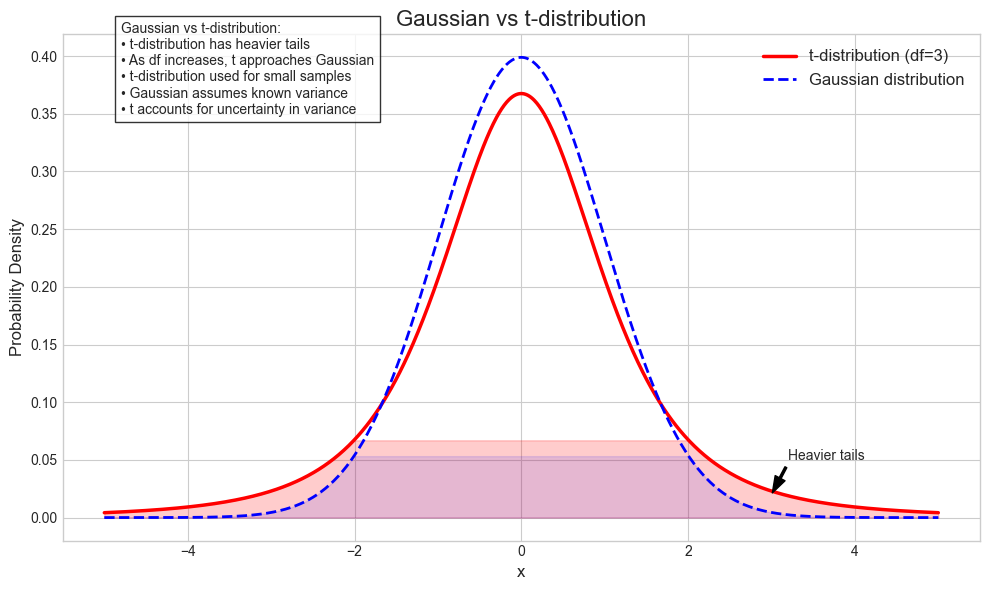

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Generate x values
x = np.linspace(-5, 5, 1000)

# Create a heavy t-distribution (low degrees of freedom)
df = 3  # degrees of freedom
t_pdf = stats.t.pdf(x, df)

# Create a standard Gaussian distribution
gaussian_pdf = stats.norm.pdf(x)

# Plot the distributions
plt.plot(x, t_pdf, 'r-', linewidth=2.5, label=f't-distribution (df={df})')
plt.plot(x, gaussian_pdf, 'b--', linewidth=2, label='Gaussian distribution')

# Highlight the tail regions
tail_threshold = 2
tail_indices = np.abs(x) > tail_threshold
plt.fill_between(x[tail_indices], 0, t_pdf[tail_indices], color='red', alpha=0.2)
plt.fill_between(x[tail_indices], 0, gaussian_pdf[tail_indices], color='blue', alpha=0.1)

# Add annotations for the tails
plt.annotate('Heavier tails', xy=(3, 0.02), xytext=(3.2, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

# Add title and labels
plt.title('Gaussian vs t-distribution', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=12)

# Add descriptive text
plt.text(-4.8, 0.35, 
         "Gaussian vs t-distribution:\n" + 
         "• t-distribution has heavier tails\n" +
         "• As df increases, t approaches Gaussian\n" +
         "• t-distribution used for small samples\n" +
         "• Gaussian assumes known variance\n" +
         "• t accounts for uncertainty in variance",
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()